In [3]:
import os
import random
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Disable symlink warnings
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [5]:
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

models_to_test = [
    'all-MiniLM-L6-v2',
    'distilbert-base-nli-stsb-mean-tokens',
    'roberta-base-nli-stsb-mean-tokens',
    'bert-base-nli-mean-tokens'
]

Accuracy with 20% training data: 0.52
Accuracy with 40% training data: 0.52
Accuracy with 60% training data: 0.52
Accuracy with 80% training data: 0.52
Accuracy with 100% training data: 0.52


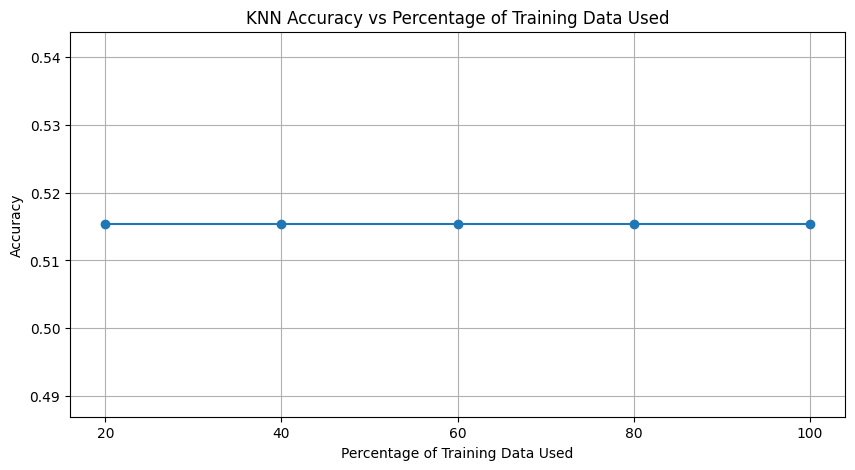

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')
x_train_embeddings = model.encode(train_emoticon_X)
x_val_embeddings = model.encode(valid_emoticon_X)

percentages = [20 , 40 , 60 , 80 , 100]
accuracies = []

for percent in percentages:
    n_samples = int(len(x_train_embeddings) * percent / 100)

    x_train_subset = x_train_embeddings[:n_samples]
    y_train_subset = train_emoticon_Y[:n_samples]

    knn = KNeighborsClassifier(n_neighbors=50)
    knn.fit(x_train_subset, y_train_subset)
    predicted_labels = knn.predict(x_val_embeddings)

    accuracy = accuracy_score(valid_emoticon_Y, predicted_labels)
    accuracies.append(accuracy)

for percent, accuracy in zip(percentages, accuracies):
    print(f'Accuracy with {percent}% training data: {accuracy:.2f}')

plt.figure(figsize=(10, 5))
plt.plot(percentages, accuracies, marker='o')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Percentage of Training Data Used')
plt.grid()
plt.xticks(percentages)
plt.show()